In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn import model_selection, svm
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
df = pd.read_csv('/content/drive/My Drive/project/Telemarketing/bank-additional-full.csv', delimiter=';')

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
# checking if the data set as null values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

#Converting the columns with categorical features to dummy variables

In [ ]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]],prefix=feature_to_encode).iloc[:,1:]
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res)

In [ ]:
columns = [ 'job', 'marital','education', 'default', 'housing','loan','contact','month','day_of_week','poutcome','y']

In [ ]:
df_copy = df
data = df

In [ ]:
for i in columns:
    data = encode_and_bind(data, i)

In [ ]:
data.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0


In [ ]:
data.shape

(41188, 54)

In [ ]:
X = data.drop(['y_yes'],axis=1)
Y = data['y_yes']

#Creating decission tree classifier


In [ ]:
# creating Decision Tree and RandomForestClassifie
model_dt_E_1 = DecisionTreeClassifier(max_depth=1, criterion='entropy', random_state=0)
model_dt_E_2 = DecisionTreeClassifier(max_depth=2, criterion='entropy', random_state=0)
model_dt_E_N = DecisionTreeClassifier(criterion='entropy', random_state=0)
model_dt_G_1 = DecisionTreeClassifier(max_depth=1, criterion='gini', random_state=0)
model_dt_G_2 = DecisionTreeClassifier(max_depth=2, criterion='gini', random_state=0)
model_dt_G_N = DecisionTreeClassifier( criterion='gini', random_state=0)



results = {}
kfold = 10

# Findind the cross validation score for Decision Tree

results['DecisionTree_Entropy_1'] = model_selection.cross_val_score(model_dt_E_1, X, Y, cv = kfold).mean()
results['DecisionTree_Entropy_2'] = model_selection.cross_val_score(model_dt_E_2, X, Y, cv = kfold).mean()
results['DecisionTree_Entropy_N'] = model_selection.cross_val_score(model_dt_E_N, X, Y, cv = kfold).mean()
results['DecisionTree_Gini_1'] = model_selection.cross_val_score(model_dt_G_1, X, Y, cv = kfold).mean()
results['DecisionTree_Gini_2'] = model_selection.cross_val_score(model_dt_G_2, X, Y, cv = kfold).mean()
results['DecisionTree_Gini_N'] = model_selection.cross_val_score(model_dt_G_N, X, Y, cv = kfold).mean()

In [ ]:
results

{'DecisionTree_Entropy_1': 0.83171202500265,
 'DecisionTree_Entropy_2': 0.82141826438114,
 'DecisionTree_Entropy_N': 0.6123009246174487,
 'DecisionTree_Gini_1': 0.83171202500265,
 'DecisionTree_Gini_2': 0.8227286490624183,
 'DecisionTree_Gini_N': 0.6481631515828107}

Ploting ROC curve and finding the area under the curve for Decision Tree

In [ ]:
roc_train_X, roc_test_X, roc_train_Y, roc_test_Y = model_selection.train_test_split(X, Y, test_size=0.25)

In [ ]:
models_Destree = [
    {
        'label' : 'DecisionTree_Entropy_1',
        'model': model_dt_E_1,
        'roc_train': roc_train_X,
        'roc_test': roc_test_X,
        'roc_train_class': roc_train_Y,        
        'roc_test_class': roc_test_Y,        
    },        
    {
        'label' : 'DecisionTree_Entropy_2',
        'model': model_dt_E_2,
        'roc_train': roc_train_X,
        'roc_test': roc_test_X,
        'roc_train_class': roc_train_Y,        
        'roc_test_class': roc_test_Y,        
    },  
    {
        'label' : 'DecisionTree_Entropy_N',
        'model': model_dt_E_N ,
        'roc_train': roc_train_X,
        'roc_test': roc_test_X,
        'roc_train_class': roc_train_Y,        
        'roc_test_class': roc_test_Y,        
    },  
    {
        'label' : 'DecisionTree_Gini_1',
        'model': model_dt_G_1,
        'roc_train': roc_train_X,
        'roc_test': roc_test_X,
        'roc_train_class': roc_train_Y,        
        'roc_test_class': roc_test_Y,        
    },        
    {
        'label' : 'DecisionTree_Gini_2',
        'model': model_dt_G_2,
        'roc_train': roc_train_X,
        'roc_test': roc_test_X,
        'roc_train_class': roc_train_Y,        
        'roc_test_class': roc_test_Y,        
    },  
    {
        'label' : 'DecisionTree_Gini_N',
        'model': model_dt_G_N ,
        'roc_train': roc_train_X,
        'roc_test': roc_test_X,
        'roc_train_class': roc_train_Y,        
        'roc_test_class': roc_test_Y,        
    }  

    ]  

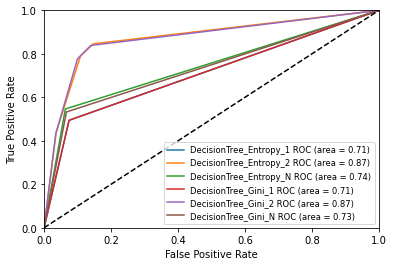

In [ ]:
for m in models_Destree:
    m['model'].probability = True
    probas = m['model'].fit(m['roc_train'], m['roc_train_class']).predict_proba(m['roc_test'])
    fpr, tpr, thresholds = roc_curve(m['roc_test_class'], probas[:, 1])
    roc_auc  = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], roc_auc))


plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=0, fontsize='small')
plt.show()

#creating Random forest

In [ ]:
model_rf_E_1 = RandomForestClassifier(max_depth=1, criterion='entropy')
model_rf_E_2 = RandomForestClassifier(max_depth=2, criterion='entropy')
model_rf_E_N = RandomForestClassifier(criterion='entropy')
model_rf_G_1 = RandomForestClassifier(max_depth=1, criterion='gini')
model_rf_G_2 = RandomForestClassifier(max_depth=2, criterion='gini')
model_rf_G_N = RandomForestClassifier( criterion='gini')

# Findind the cross validation score for Random Forest Classifier

results['RandomForestClassifier_Entropy_1'] = model_selection.cross_val_score(model_rf_E_1, X, Y, cv = kfold).mean()
results['RandomForestClassifier_Entropy_2'] = model_selection.cross_val_score(model_rf_E_2, X, Y, cv = kfold).mean()
results['RandomForestClassifier_Entropy_N'] = model_selection.cross_val_score(model_rf_E_N, X, Y, cv = kfold).mean()
results['RandomForestClassifier_Gini_1'] = model_selection.cross_val_score(model_rf_G_1, X, Y, cv = kfold).mean()
results['RandomForestClassifier_Gini_2'] = model_selection.cross_val_score(model_rf_G_2, X, Y, cv = kfold).mean()
results['RandomForestClassifier_Gini_N'] = model_selection.cross_val_score(model_rf_G_N, X, Y, cv = kfold).mean()

In [ ]:
results

{'DecisionTree_Entropy_1': 0.83171202500265,
 'DecisionTree_Entropy_2': 0.82141826438114,
 'DecisionTree_Entropy_N': 0.6123009246174487,
 'DecisionTree_Gini_1': 0.83171202500265,
 'DecisionTree_Gini_2': 0.8227286490624183,
 'DecisionTree_Gini_N': 0.6481631515828107,
 'RandomForestClassifier_Entropy_1': 0.8549028943567054,
 'RandomForestClassifier_Entropy_2': 0.8476422060504273,
 'RandomForestClassifier_Entropy_N': 0.6739973288593437,
 'RandomForestClassifier_Gini_1': 0.8553399997476718,
 'RandomForestClassifier_Gini_2': 0.8448252162092276,
 'RandomForestClassifier_Gini_N': 0.6533370156729951}

Ploting ROC curve and finding the area under the curve for Random Forest Classifier

In [ ]:
models_Ranfor = [
    {
        'label' : 'RandomForestClassifier_Entropy_1',
        'model': model_rf_E_1,
        'roc_train': roc_train_X,
        'roc_test': roc_test_X,
        'roc_train_class': roc_train_Y,        
        'roc_test_class': roc_test_Y,        
    },        
    {
        'label' : 'RandomForestClassifier_Entropy_2',
        'model': model_rf_E_2,
        'roc_train': roc_train_X,
        'roc_test': roc_test_X,
        'roc_train_class': roc_train_Y,        
        'roc_test_class': roc_test_Y,        
    },  
    {
        'label' : 'RandomForestClassifier_Entropy_N',
        'model': model_rf_E_N ,
        'roc_train': roc_train_X,
        'roc_test': roc_test_X,
        'roc_train_class': roc_train_Y,        
        'roc_test_class': roc_test_Y,        
    },  
    {
        'label' : 'RandomForestClassifier_Gini_1',
        'model': model_rf_G_1,
        'roc_train': roc_train_X,
        'roc_test': roc_test_X,
        'roc_train_class': roc_train_Y,        
        'roc_test_class': roc_test_Y,        
    },        
    {
        'label' : 'RandomForestClassifier_Gini_2',
        'model': model_rf_G_2,
        'roc_train': roc_train_X,
        'roc_test': roc_test_X,
        'roc_train_class': roc_train_Y,        
        'roc_test_class': roc_test_Y,        
    },  
    {
        'label' : 'RandomForestClassifier_Gini_N',
        'model': model_rf_G_N ,
        'roc_train': roc_train_X,
        'roc_test': roc_test_X,
        'roc_train_class': roc_train_Y,        
        'roc_test_class': roc_test_Y,        
    }
]

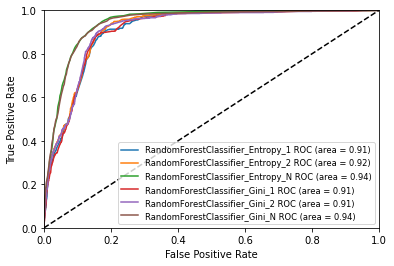

In [ ]:
for m in models_Ranfor:
    m['model'].probability = True
    probas = m['model'].fit(m['roc_train'], m['roc_train_class']).predict_proba(m['roc_test'])
    fpr, tpr, thresholds = roc_curve(m['roc_test_class'], probas[:, 1])
    roc_auc  = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], roc_auc))


plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=0, fontsize='small')
plt.show()

#Creating naive bayes classifier and Ploting ROC curve

In [ ]:
model_NB = GaussianNB(priors=None, var_smoothing=1e-09)

results['NB'] = model_selection.cross_val_score(model_NB, X, Y, cv = kfold).mean()

In [ ]:
results['NB']

0.8082629261264651

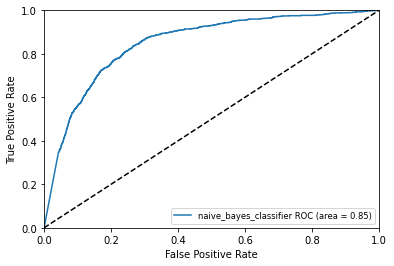

In [ ]:
models_NB = [
    {
        'label' : 'naive_bayes_classifier',
        'model': model_NB,
        'roc_train': roc_train_X,
        'roc_test': roc_test_X,
        'roc_train_class': roc_train_Y,        
        'roc_test_class': roc_test_Y,        
    }
]

for m in models_NB:
    m['model'].probability = True
    probas = m['model'].fit(m['roc_train'], m['roc_train_class']).predict_proba(m['roc_test'])
    fpr, tpr, thresholds = roc_curve(m['roc_test_class'], probas[:, 1])
    roc_auc  = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], roc_auc))


plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=0, fontsize='small')
plt.show()

#Creating SVM classifier and Ploting ROC curve

In [ ]:
model_svc_1 = SVC(C=1,kernel='rbf', random_state=0)
model_svc_0 = SVC(C=0.1,kernel='rbf', random_state=0)
model_svc_3 = SVC(C=3,kernel='rbf', random_state=0)

models_SVM = [
    {
        'label' : 'SVM_1',
        'model': model_svc_1,
        'roc_train': roc_train_X,
        'roc_test': roc_test_X,
        'roc_train_class': roc_train_Y,        
        'roc_test_class': roc_test_Y,        
    }, 
    {
        'label' : 'SVM_0',
        'model': model_svc_0,
        'roc_train': roc_train_X,
        'roc_test': roc_test_X,
        'roc_train_class': roc_train_Y,        
        'roc_test_class': roc_test_Y,        
    }, 
    {
        'label' : 'SVM_3',
        'model': model_svc_3,
        'roc_train': roc_train_X,
        'roc_test': roc_test_X,
        'roc_train_class': roc_train_Y,        
        'roc_test_class': roc_test_Y,        
    },        
]

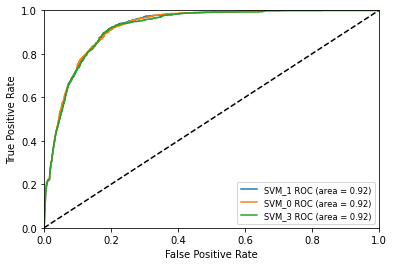

In [ ]:
for m in models_SVM:
    m['model'].probability = True
    probas = m['model'].fit(m['roc_train'], m['roc_train_class']).predict_proba(m['roc_test'])
    fpr, tpr, thresholds = roc_curve(m['roc_test_class'], probas[:, 1])
    roc_auc  = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], roc_auc))


plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=0, fontsize='small')
plt.show()

#Creating Logistic Regression classifier and Ploting ROC curve

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [ ]:
 
model_lr_l2 = LogisticRegression(penalty='l2', tol=0.01) 

results['LogisticRegression_2'] = model_selection.cross_val_score(model_lr_l2, X, Y, cv = kfold).mean()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


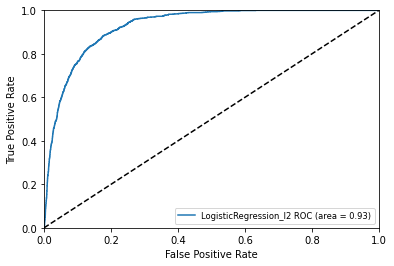

In [ ]:
models_LR = [
    
    {
        'label' : 'LogisticRegression_l2',
        'model': model_lr_l2,
        'roc_train': roc_train_X,
        'roc_test': roc_test_X,
        'roc_train_class': roc_train_Y,        
        'roc_test_class': roc_test_Y,        
    },
]
for m in models_LR:
    m['model'].probability = True
    probas = m['model'].fit(m['roc_train'], m['roc_train_class']).predict_proba(m['roc_test'])
    fpr, tpr, thresholds = roc_curve(m['roc_test_class'], probas[:, 1])
    roc_auc  = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], roc_auc))


plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=0, fontsize='small')
plt.show()

#Creating Neural Network classifier and Ploting ROC curve

In [ ]:
model_NN_1 = MLPClassifier()
model_NN_2 = MLPClassifier(hidden_layer_sizes=2)
model_NN_3 = MLPClassifier(hidden_layer_sizes=3)
model_NN_4 = MLPClassifier(hidden_layer_sizes=4)
model_NN_5 = MLPClassifier(hidden_layer_sizes=5)
model_NN_6 = MLPClassifier(hidden_layer_sizes=6)
model_NN_7 = MLPClassifier(hidden_layer_sizes=7)
model_NN_8 = MLPClassifier(hidden_layer_sizes=8)
results['Neural Network_1'] = model_selection.cross_val_score(model_NN_1, X, Y, cv = kfold).mean()
results['Neural Network_2'] = model_selection.cross_val_score(model_NN_2, X, Y, cv = kfold).mean() 
results['Neural Network_3'] = model_selection.cross_val_score(model_NN_3, X, Y, cv = kfold).mean() 
results['Neural Network_4'] = model_selection.cross_val_score(model_NN_4, X, Y, cv = kfold).mean() 
results['Neural Network_5'] = model_selection.cross_val_score(model_NN_5, X, Y, cv = kfold).mean() 
results['Neural Network_6'] = model_selection.cross_val_score(model_NN_6, X, Y, cv = kfold).mean() 
results['Neural Network_7'] = model_selection.cross_val_score(model_NN_7, X, Y, cv = kfold).mean() 
results['Neural Network_8'] = model_selection.cross_val_score(model_NN_8, X, Y, cv = kfold).mean()

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
models_NN = [
    {
        'label' : 'Neural Network_1',
        'model': model_NN_1,
        'roc_train': roc_train_X,
        'roc_test': roc_test_X,
        'roc_train_class': roc_train_Y,        
        'roc_test_class': roc_test_Y,        
    }, 
    {
        'label' : 'Neural Network_2',
        'model': model_NN_2,
        'roc_train': roc_train_X,
        'roc_test': roc_test_X,
        'roc_train_class': roc_train_Y,        
        'roc_test_class': roc_test_Y,        
    }, 
    {
        'label' : 'Neural Network_3',
        'model': model_NN_3,
        'roc_train': roc_train_X,
        'roc_test': roc_test_X,
        'roc_train_class': roc_train_Y,        
        'roc_test_class': roc_test_Y,        
    },
    {
        'label' : 'Neural Network_4',
        'model': model_NN_4,
        'roc_train': roc_train_X,
        'roc_test': roc_test_X,
        'roc_train_class': roc_train_Y,        
        'roc_test_class': roc_test_Y,        
    },
    {
        'label' : 'Neural Network_5',
        'model': model_NN_5,
        'roc_train': roc_train_X,
        'roc_test': roc_test_X,
        'roc_train_class': roc_train_Y,        
        'roc_test_class': roc_test_Y,        
    },
    {
        'label' : 'Neural Network_6',
        'model': model_NN_6,
        'roc_train': roc_train_X,
        'roc_test': roc_test_X,
        'roc_train_class': roc_train_Y,        
        'roc_test_class': roc_test_Y,        
    },
    {
        'label' : 'Neural Network_7',
        'model': model_NN_7,
        'roc_train': roc_train_X,
        'roc_test': roc_test_X,
        'roc_train_class': roc_train_Y,        
        'roc_test_class': roc_test_Y,        
    },
    {
        'label' : 'Neural Network_8',
        'model': model_NN_8,
        'roc_train': roc_train_X,
        'roc_test': roc_test_X,
        'roc_train_class': roc_train_Y,        
        'roc_test_class': roc_test_Y,        
    },
]


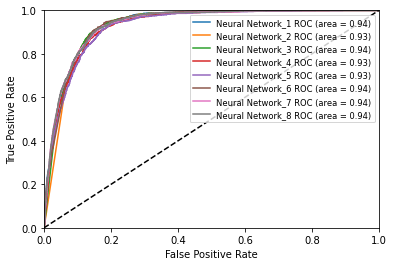

In [ ]:
for m in models_NN:
    m['model'].probability = True
    probas = m['model'].fit(m['roc_train'], m['roc_train_class']).predict_proba(m['roc_test'])
    fpr, tpr, thresholds = roc_curve(m['roc_test_class'], probas[:, 1])
    roc_auc  = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], roc_auc))


plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=0, fontsize='small')
plt.show()

In [ ]:
results

{'DecisionTree_Entropy_1': 0.83171202500265,
 'DecisionTree_Entropy_2': 0.82141826438114,
 'DecisionTree_Entropy_N': 0.6123009246174487,
 'DecisionTree_Gini_1': 0.83171202500265,
 'DecisionTree_Gini_2': 0.8227286490624183,
 'DecisionTree_Gini_N': 0.6481631515828107,
 'LogisticRegression_2': 0.8529098796005812,
 'NB': 0.8082629261264651,
 'Neural Network_1': 0.8211288004121201,
 'Neural Network_2': 0.8954071803383107,
 'Neural Network_3': 0.8349408225731312,
 'Neural Network_4': 0.8296731431274609,
 'Neural Network_5': 0.820179970076716,
 'Neural Network_6': 0.8349897671518558,
 'Neural Network_7': 0.8263727268214524,
 'Neural Network_8': 0.8202536522430496,
 'RandomForestClassifier_Entropy_1': 0.8549028943567054,
 'RandomForestClassifier_Entropy_2': 0.8476422060504273,
 'RandomForestClassifier_Entropy_N': 0.6739973288593437,
 'RandomForestClassifier_Gini_1': 0.8553399997476718,
 'RandomForestClassifier_Gini_2': 0.8448252162092276,
 'RandomForestClassifier_Gini_N': 0.6533370156729951}